# AlphaZero Algorithm

This notebook was built to conduct experiences on the AlphaZero Algorithm and better understand its implementation details

# Import libraries / modules

In [1]:
# Python libraries
import time

# 3rd party libraries
import matplotlib.pyplot as plt
import numpy as np

# Game-related libraries
import games_mod # Games
import policy_mod # neural network
from play_mod import Play
import training_mod
from game_utils import DotDict, policy_player_mcts, random_player, match_ai

# Game, Training and Play Settings

In [ ]:
# Game settings
game_settings = DotDict({
    "board_size": (3,3),
    "N": 3
})

# Self-play training settings
game_training_settings = DotDict({
    "comp_interval":100,
    "episods": 1000,
    "explore_steps": 50,
    "temp_threshold": [300, 0.01] #[x,y] means "up to x episods, applies y temperature"
})
# neural network settings
nn_training_settings = DotDict({
    "load_policy": False,
    "ai_ckp": "",
    "lr": .01, 
    "weight_decay": 1.e-4,
})

# play settings
play_settings = DotDict({
    "explore_steps": 50,
    "temperature": 0.01                         
})

# Training the AI (Optional)

In [ ]:
game=games_mod.ConnectN(game_settings)
policy = policy_mod.Policy()

In [ ]:
alpha_0 = training_mod.AlphaZeroTraining(
    game_settings, 
    game_training_settings, 
    nn_training_settings, 
    policy)

In [ ]:
losses = alpha_0.get_losses()
plt.plot(losses)
plt.show()

# Playing against AI

Below is a visualization of a game with 2 players who can either be humans or AIs. 
Player1 means the player who will start the game.
Set player 1 = None or player2 = None for player 1 or player 2 to be played by humans. Otherwise, set a function that takes a game as an input and returns a position.

<IPython.core.display.Javascript object>


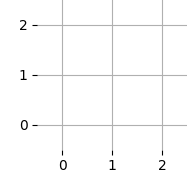

In [16]:
%matplotlib notebook
gameplay=Play(games_mod.ConnectN(game_settings), 
              player2=policy_player_mcts, 
              player1=None,
              play_settings = play_settings,
              visual = True)

# Competition between 2 AIs
If the AI is perfectly trained, it should never win, nor lose against itself

In [ ]:
total_wins, total_losses = match_ai(game_settings, play_settings, total_rounds = 100)

## Question: What are some parameters to generate a perfect tic-tac-toe agent?

In [8]:
# Game settings
game_settings = DotDict({
    "board_size": (3,3),
    "N": 3
})

# Self-play training settings
game_training_settings = DotDict({
    "comp_interval":100,
    "episods": 350,
    "explore_steps": 50,
    "temp_threshold": [50, 0.01] #[x,y] means "up to x episods, applies y temperature"
})
# neural network settings
nn_training_settings = DotDict({
    "load_policy": False,
    "ai_ckp": "",
    "lr": .01, 
    "weight_decay": 0.01,
})

# play settings
play_settings = DotDict({
    "explore_steps": 50,
    "temperature": 0.1                         
})
game=games_mod.ConnectN(game_settings)
policy = policy_mod.Policy()
alpha_0 = training_mod.AlphaZeroTraining(
    game_settings, 
    game_training_settings, 
    nn_training_settings, 
    policy)

total_wins, total_losses = match_ai(game_settings, play_settings, total_rounds = 100)

Total wins / losses of Player 1 : 0 / 0


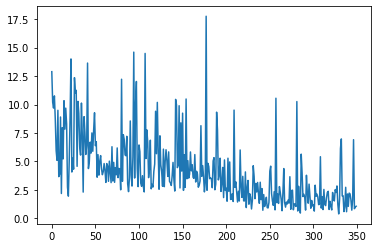

In [9]:
losses = alpha_0.get_losses()
plt.plot(losses)
plt.show()

In [5]:
import numpy as np
np.array(losses).mean()

5.359571396211783

The perfect AI parameters are stored in the checkpoint: perfect_ai_ckp.pth

## Question: What is the computational cost (= speed here) of the main elements of the training algorithm?

In [2]:
# Game settings
game_settings = DotDict({
    "board_size": (3,3),
    "N": 3
})

# Self-play training settings
game_training_settings = DotDict({
    "comp_interval":100,
    "episods": 500,
    "explore_steps": 50,
    "temp_threshold": [300, 0.01] #[x,y] means "up to x episods, applies y temperature"
})
# neural network settings
nn_training_settings = DotDict({
    "load_policy": False,
    "ai_ckp": "",
    "lr": .01, 
    "weight_decay": 1.e-4,
})

# play settings
play_settings = DotDict({
    "explore_steps": 50,
    "temperature": 0.01                         
})
game=games_mod.ConnectN(game_settings)
policy = policy_mod.Policy()
t0 = time.time()

alpha_0 = training_mod.AlphaZeroTraining(
    game_settings, 
    game_training_settings, 
    nn_training_settings, 
    policy)
t1 = time.time()
total_time = t1 - t0
total_wins, total_losses = match_ai(game_settings, play_settings, total_rounds = 100)

game:  500 , mean loss: 1.32 , Last 10 Results:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Total wins / losses of Player 1 : 3 / 8


### Get Total Time

In [21]:
print ("Total time: {}".format(total_time))

Total time: 56.99347400665283


### Get some time_stats

In [4]:
self_play_time, training_time, mcts_explore_time, count_steps = alpha_0.get_time_stats()

### Number of self-play games 

In [12]:
print ("Number of self-play games: {}, average duration: {}".format(
    len(self_play_time), np.array(self_play_time).mean()))

Number of self-play games: 500, average duration: 0.11108353233337402


In [26]:
print ("Number of NN training: {}, average duration for NN training: {}".format(
    len(training_time), np.array(training_time).mean()))

Number of NN training: 500, average duration for NN training: 0.0028328547477722166


In [27]:
print ("Number of self-play games: {}, average duration for MCTS explore: {}".format(
    len(mcts_explore_time), np.array(mcts_explore_time).mean()))

Number of self-play games: 500, average duration for MCTS explore: 0.01361072230982402


In [28]:
print ("average steps per game: {}".format(np.array(count_steps).mean()))

average steps per game: 8.35


total time = number of self-play x average duration per self_play + other

In [24]:
500 * 0.11108353233337402 + 1.45

56.991766166687015

time_per_self_play = mcts_explore_time x average_count_steps + nn_training_time + others

In [20]:
0.01361072230982402 * 8.35 + 0.0028328547477722166 - 0.005

0.11148238603480276

Computational cost is mainly a function of #self-play, #MCTS-exploration steps. Average number of steps per game seem is game-specific. NN training time seems very low compared to game-generation time.

## How does MCTS exploration time grows according to MCTS exploration steps?

The intuition is that total time does not grow linearly as we are re-using previously epxlored nodes

In [36]:
# Game settings
game_settings = DotDict({
    "board_size": (3,3),
    "N": 3
})

# Self-play training settings
game_training_settings = DotDict({
    "comp_interval":100,
    "episods": 100,
    "explore_steps": 50,
    "temp_threshold": [300, 0.01] #[x,y] means "up to x episods, applies y temperature"
})
# neural network settings
nn_training_settings = DotDict({
    "load_policy": False,
    "ai_ckp": "",
    "lr": .01, 
    "weight_decay": 1.e-4,
})

# play settings
play_settings = DotDict({
    "explore_steps": 50,
    "temperature": 0.01                         
})
averages = []
for j in range (10, 70, 5):
    
    game_training_settings.explore_steps = j

    game=games_mod.ConnectN(game_settings)
    policy = policy_mod.Policy()
    t0 = time.time()

    alpha_0 = training_mod.AlphaZeroTraining(
        game_settings, 
        game_training_settings, 
        nn_training_settings, 
        policy)

    self_play_time, training_time, mcts_explore_time, count_steps = alpha_0.get_time_stats()

    print ("Number of MCTS explore: {}, average duration per MCTS explore steps {}".
           format(j, np.array(mcts_explore_time).mean() / j ))
    averages.append(np.array(mcts_explore_time).mean() / j)

Number of MCTS explore: 10, average duration per MCTS explore steps 0.0004876944009273771
Number of MCTS explore: 15, average duration per MCTS explore steps 0.000395330846498883
Number of MCTS explore: 20, average duration per MCTS explore steps 0.00040627894992866214
Number of MCTS explore: 25, average duration per MCTS explore steps 0.00035540867544355843
Number of MCTS explore: 30, average duration per MCTS explore steps 0.00033770780768344007
Number of MCTS explore: 35, average duration per MCTS explore steps 0.0003415522790009203
Number of MCTS explore: 40, average duration per MCTS explore steps 0.00033436938954724206
Number of MCTS explore: 45, average duration per MCTS explore steps 0.0002925277187500471
Number of MCTS explore: 50, average duration per MCTS explore steps 0.00022518552861516442
Number of MCTS explore: 55, average duration per MCTS explore steps 0.00024399842383369564
Number of MCTS explore: 60, average duration per MCTS explore steps 0.0003335715509123272
Numbe

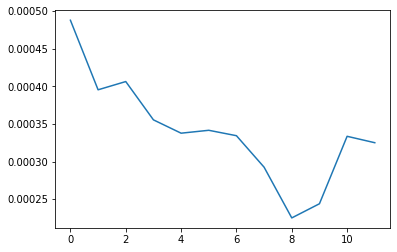

In [37]:
plt.plot(averages)
plt.show()

## Trade-offs MCTS Explore Steps vs. Training the neural networks

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

total_rounds = 50

results = np.zeros((5, 5))

mcts_index = 0
for mcts_explore_steps in range (25, 75, 10):

    episods_index = 0
    for episods in range(300, 1300, 200):
        #Train the network
        game_training_settings["explore_steps"] = mcts_explore_steps
        play_settings["explore_steps"] = mcts_explore_steps
        game_training_settings["episods"] = episods
        game=games_mod.ConnectN(game_settings)
        
        policy = policy_mod.Policy()
        alpha_0 = training_mod.AlphaZeroTraining(
            game_settings, 
            game_training_settings, 
            nn_training_settings, 
            policy)
        
        print ("Training for mcts {} and episods {} done".format(mcts_explore_steps, episods))

        total_wins, total_losses = match_ai(game_settings, play_settings, total_rounds = total_rounds)
        player_strength = 1 - (total_wins + total_losses) / total_rounds
        results[episods_index][mcts_index] = player_strength
        
        #print (results)
        
        episods_index+=1
    
    mcts_index+=1


plt.imshow(results, cmap='coolwarm', interpolation='nearest')
plt.show()

# TO DO LIST

* introduce Dirichlet distribution
* Try a bigger board?
* Formatting
* Names to shorten

## Playground

In [ ]:
# Find the maximum in a dictionary
class Node:
    def __init__(self, U):
        self.U = U

Node1 = Node(12)
Node2 = Node (100)
Node3 = Node(100)

actions = ["A1", "A2", "A3"]
nodes = [Node1, Node2, Node3]
child = {a: node for a, node in zip(actions, nodes)}

#SOLUTION 1
import time
t0 = time.time()
for _ in range (100000):     
    max_U = max(c.U for c in child.values())
    actions = [a for a, c in child.items() if c.U == max_U]

t1 = time.time()
print (t1 - t0)

In [ ]:
actions

In [ ]:
#SOLUTION 2
import numpy as np
import time
actions = [ a for a, c in child.items() ]
t0 = time.time()
for _ in range (100000):    
    child_U = [ c.U for c in child.values()]    
    ind_actions = np.argwhere(child_U == np.amax(child_U))
    actions_list = [actions[a] for a in ind_actions.flatten().tolist()]

t1 = time.time()
print (t1 - t0)
